### Import statments and loading data

                    date   PopulationName        lat         lon    biomass  \
0    2016-04-20 07:00:00  Prochlorococcus  21.520326 -158.326984  10.520443   
1    2016-04-20 07:00:00    Synechococcus  21.520326 -158.326984   0.341429   
2    2016-04-20 07:00:00      non_pro_syn  21.520326 -158.326984   3.338212   
3    2016-04-20 07:00:00      non_pro_syn  21.520326 -158.326984   0.701902   
4    2016-04-20 08:00:00  Prochlorococcus  21.662710 -158.323430   9.309387   
...                  ...              ...        ...         ...        ...   
6896 2019-04-29 16:00:00      non_pro_syn  23.491830 -158.000200   1.678707   
6897 2019-04-29 17:00:00  Prochlorococcus  23.295040 -158.001120   6.017184   
6898 2019-04-29 17:00:00    Synechococcus  23.295040 -158.001120   0.558076   
6899 2019-04-29 17:00:00      non_pro_syn  23.295040 -158.001120   2.741156   
6900 2019-04-29 17:00:00      non_pro_syn  23.295040 -158.001120   1.548825   

          salin       temp cruisename        NO3NO2

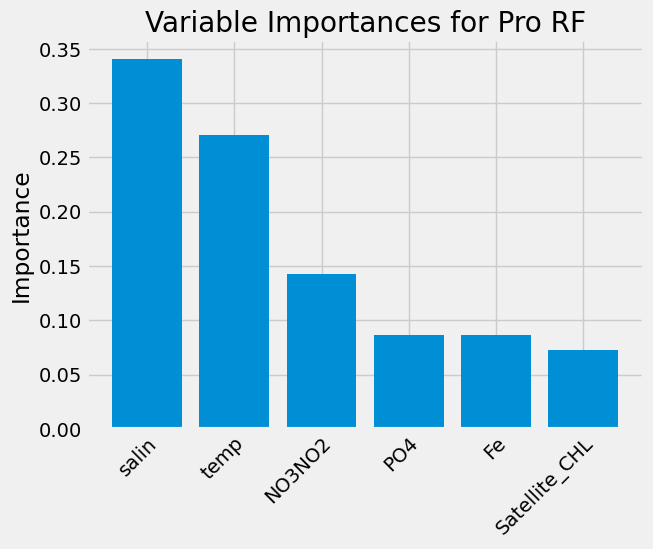

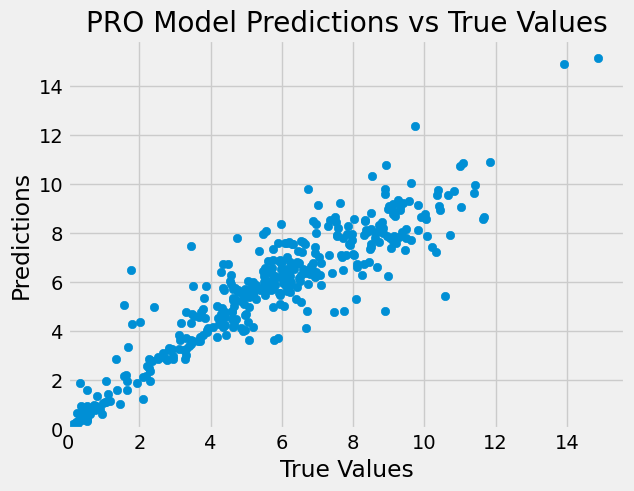

Training Features Shape: (1745, 6)
Training Labels Shape: (1745,)
Testing Features Shape: (437, 6)
Testing Labels Shape: (437,)
Mean Absolute Error: 0.46 pgC per L.
Accuracy: -116.14 %.


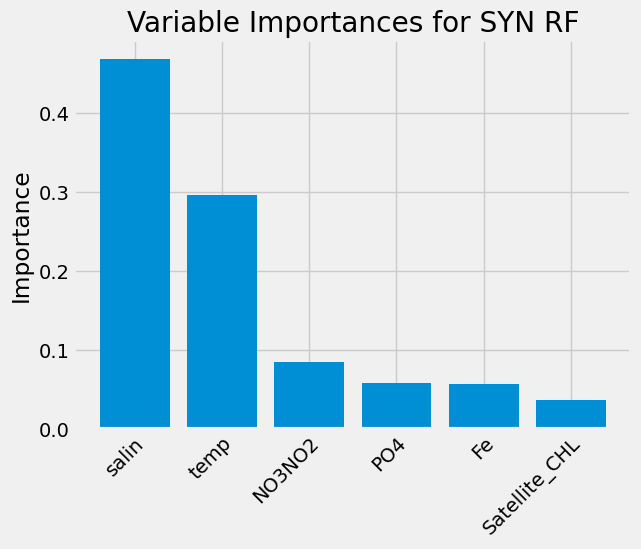

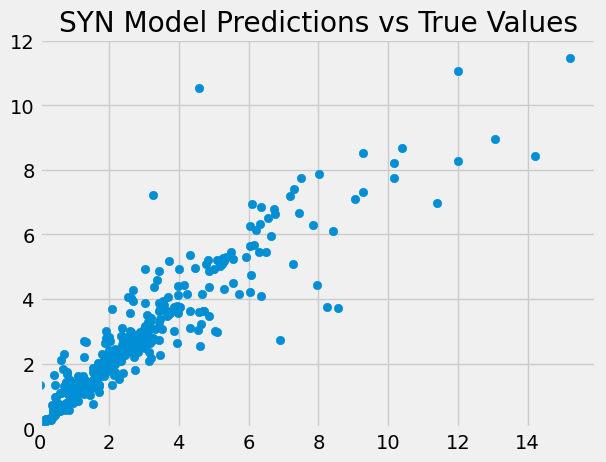

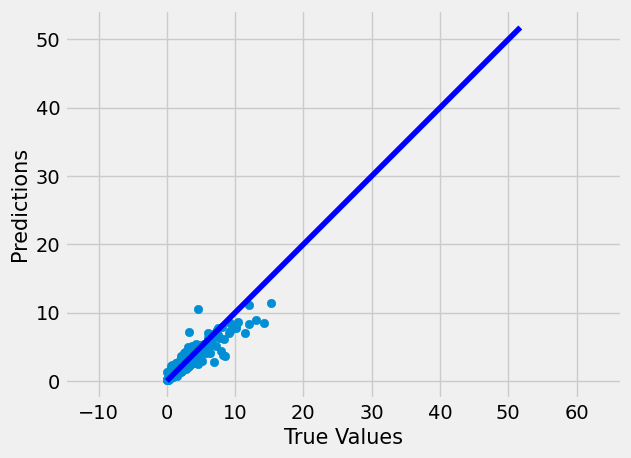

Training Features Shape: (3290, 6)
Training Labels Shape: (3290,)
Testing Features Shape: (823, 6)
Testing Labels Shape: (823,)
Mean Absolute Error: 3.97 pgC per L.
Accuracy: -33.6 %.


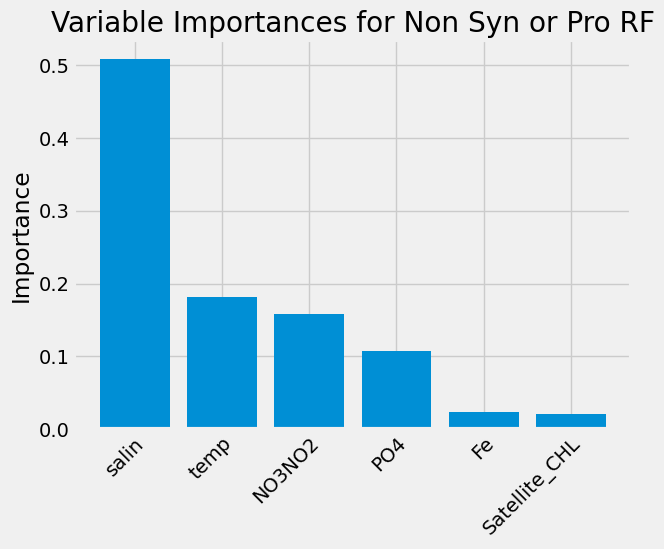

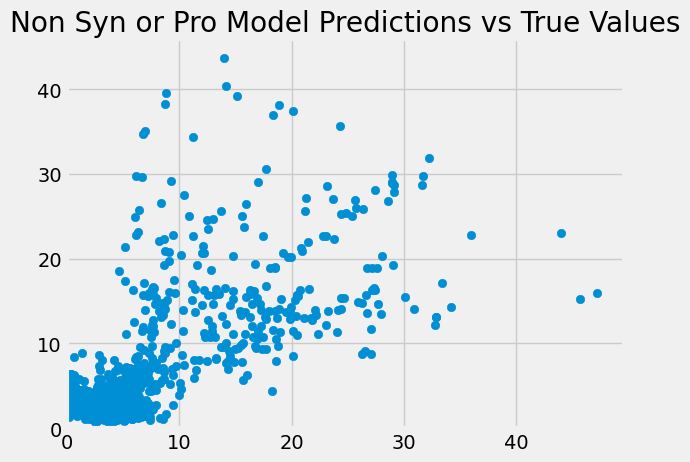

In [26]:
%run 05_model-fitting-covari-tn413.ipynb

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import joblib

In [28]:
tn413 = pd.read_csv('/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/data/TN413_merged_10min.csv')

## Prepping data for RF model to be applied

In [29]:
#function to make numpy array
def to_np(pop_feat):
    pop_feat = np.array(pop_feat)
    return pop_feat

In [30]:
tn413['PopulationName'].unique()

array(['picoeuk', 'prochloro', 'synecho'], dtype=object)

In [31]:
pro_tn413 = tn413[tn413.PopulationName == 'prochloro']
syn_tn413 = tn413[tn413.PopulationName == 'synecho']
non_tn413 = tn413[tn413.PopulationName == 'picoeuk']


pop_tn413_list = [pro_tn413, syn_tn413, non_tn413]
# creating the labels for all of the populations for biomass (using numpy array so we can predict on them)

label_pro = np.array(pro_tn413.biomass)
label_syn = np.array(syn_tn413.biomass)
label_non = np.array(non_tn413.biomass)

# Creating the features for all of the populations

#these are the dropped features
droped_features = ['date','PopulationName','cell_abundance',
                   'biomass', 'cell_abundance',
                  'cell_diameter', 'SiO4', 'lat', 'lon']

features_pro = pro_tn413.drop(droped_features, axis = 1)
features_syn = syn_tn413.drop(droped_features, axis = 1)
features_non = non_tn413.drop(droped_features, axis = 1)


# Saving feature names for later use (doesn't matter which dataframe we use since they all have same column names)
feature_list = list(features_pro.columns)
# Convert to numpy array
pop_features = [features_pro,features_syn,features_non]


features_pro = to_np(features_pro)
features_syn = to_np(features_syn)
features_non = to_np(features_non)

#creating labels to see how the model did
label_pro = np.array(pro_tn413.biomass)
label_syn = np.array(syn_tn413.biomass)
label_non = np.array(non_tn413.biomass)

## First testing Pro population

In [32]:
# #loading in Pro random forest model
# rf_pro = joblib.load("/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_pro.joblib")

In [33]:
# Use the forest's predict method on the test data
predictions_pro = rf_pro.predict(features_pro)
# Calculate the absolute errors
errors = abs(predictions_pro - label_pro)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(label_pro, predictions_pro)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')
mape = np.mean(100 * (errors / label_pro))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 3.97 pgC per L.
Accuracy: 39.89 %.


In [9]:
# Get numerical feature importances
importances = list(rf_pro.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

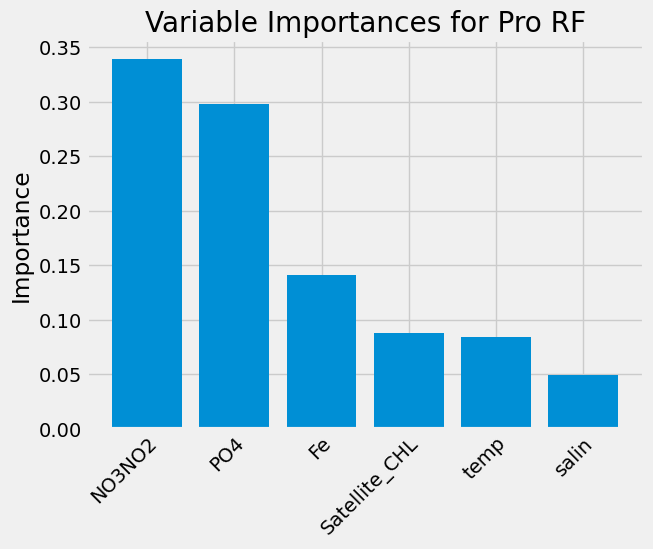

In [10]:
pro_feature_importance = pd.DataFrame(rf_pro.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=pro_feature_importance.index,height=pro_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(pro_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Pro RF');

## Plotting results as a biomass versus lattitude plot

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_actual_and_predicted_values(features, feature_list, label, test_features, predictions, title):
    # latitudes of training values
    lat = features_pro[:, feature_list.index('lat')]
    # Dataframe with true values and dates
    true_data = pd.DataFrame(data={'lat': lat, 'actual': label_pro})
    # latitudes of predictions
    test_lats = test_features[:, feature_list.index('lat')]
    # Dataframe with predictions and dates
    predictions_data = pd.DataFrame(data={'lat': test_lats, 'prediction': predictions})

    # Plot the actual values
    plt.plot(true_data['lat'], true_data['actual'], 'b-', label='actual')
    # Plot the predicted values
    plt.plot(predictions_data['lat'], predictions_data['prediction'], 'ro', label='prediction')
    plt.xticks(rotation=60)
    plt.legend()
    # Graph labels
    plt.xlabel('Latitude º')
    plt.ylabel('Biomass')
    plt.title(title)
    plt.show()


In [12]:
# plot_actual_and_predicted_values(features_pro, feature_list, label_pro, test_features_pro, predictions_pro,
#                                 title='Actual and Predicted Values (trained on tn413 including lat and lon)')

In [13]:
predictions_pro

array([1.0635202, 1.0635202, 1.0635202, ..., 1.0635202, 1.0635202,
       1.0635202])

Text(0.5, 0.98, 'Pro predicted versus True values of biomass ( trained on covariate df along with lat and lon)')

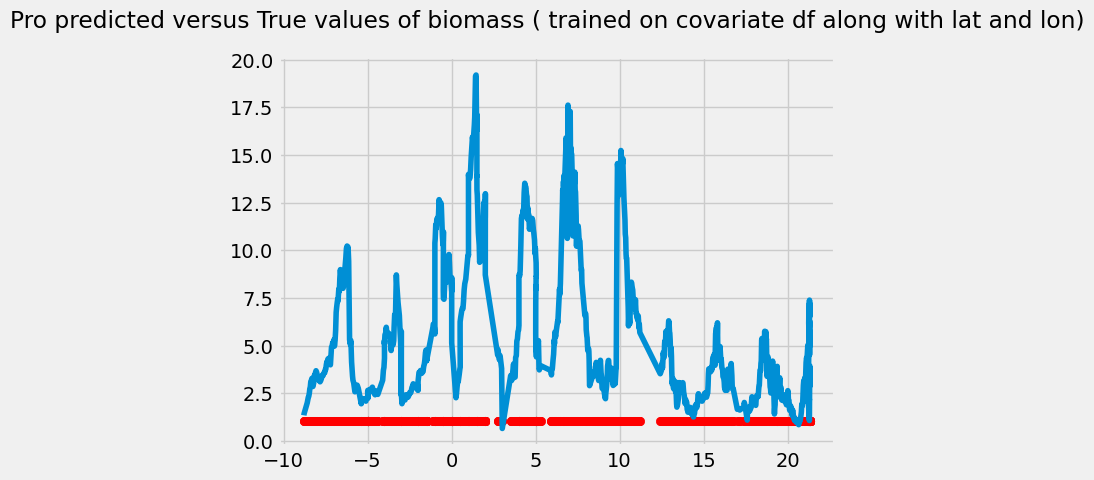

In [14]:
import matplotlib.pyplot as plt

plt.plot(pro_tn413['lat'],label_pro, label='True Value')
plt.scatter(pro_tn413['lat'], predictions_pro, label='predictions', color='red')
plt.suptitle('Pro predicted versus True values of biomass ( trained on covariate df along with lat and lon)')


(0.0, 20.116904889724633)

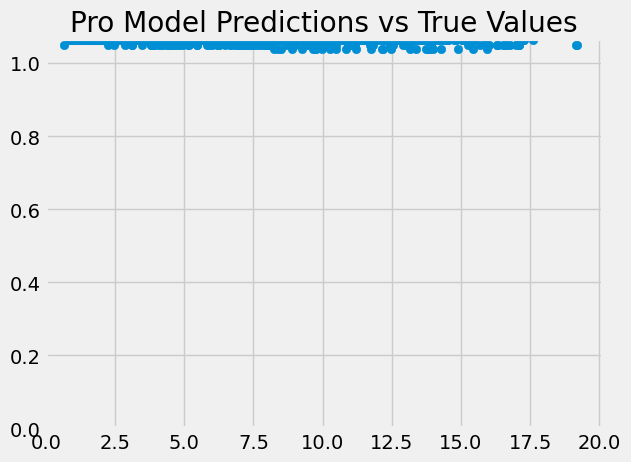

In [15]:
fig, ax = plt.subplots()
ax.scatter(label_pro, predictions_pro)
ax.set_title('Pro Model Predictions vs True Values')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)


# run the model on each individual populaton - see which does best
#put zero values when 

## Testing Syn

In [16]:
# #loading in Pro random forest model
# rf_syn = joblib.load("/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_syn.joblib")

In [17]:
# Use the forest's predict method on the test data
predictions_syn = rf_syn.predict(features_syn)
# Calculate the absolute errors
errors = abs(predictions_syn - label_syn)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(label_syn, predictions_syn)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')

Mean Absolute Error: 45.27 pgC per L.


In [18]:
predictions_syn

array([47.00919769, 47.00919769, 47.00919769, ..., 47.00919769,
       47.00919769, 47.00919769])

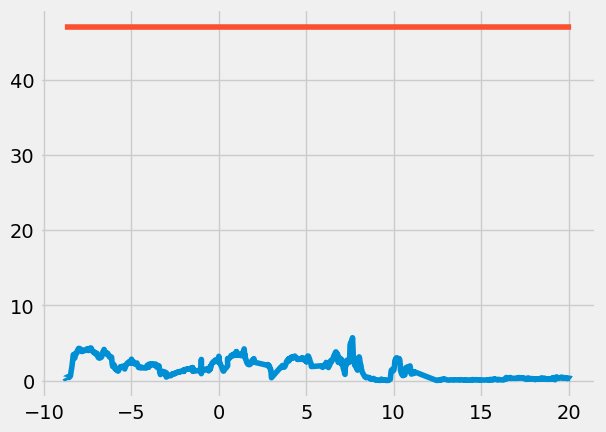

In [19]:
import matplotlib.pyplot as plt

plt.plot(syn_tn413['lat'],label_syn, label='True Value')
plt.plot(syn_tn413['lat'], predictions_syn, label='predictions')
# plt.plot(df2['latitude'], label_pro], label='Biomass 2')


In [20]:
# #loading in Pro random forest model
# rf_syn = joblib.load("/Users/cristianswift/Desktop/Spring-Quarter-2022-2023/SeniorThesis/RF_models/random_forest_syn.joblib")

In [21]:
# Use the forest's predict method on the test data
predictions_syn = rf_syn.predict(features_syn)
# Calculate the absolute errors
errors = abs(predictions_syn - label_syn)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

mae = mean_absolute_error(label_syn, predictions_syn)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')

Mean Absolute Error: 45.27 pgC per L.


In [22]:
# Get numerical feature importances
importances = list(rf_syn.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

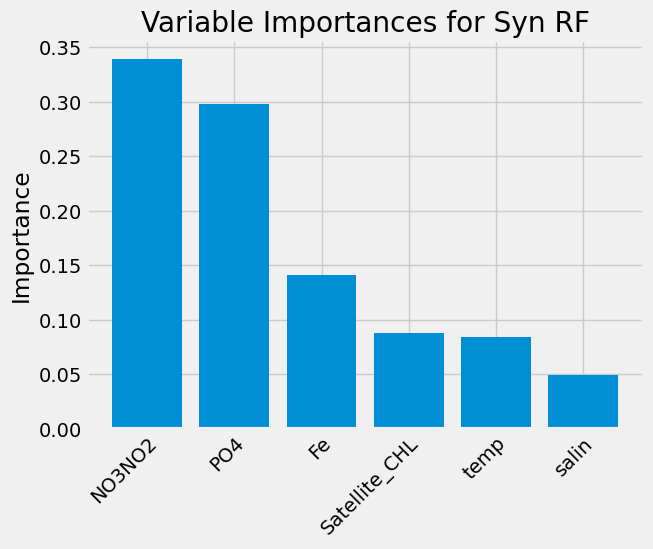

In [23]:
syn_feature_importance = pd.DataFrame(rf_pro.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=syn_feature_importance.index,height=syn_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(pro_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Syn RF');

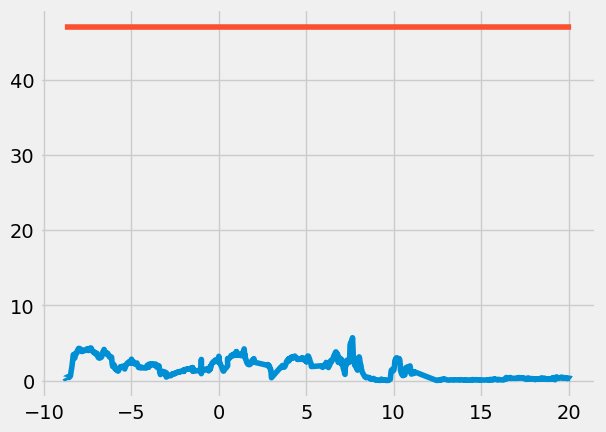

In [24]:
import matplotlib.pyplot as plt

plt.plot(syn_tn413['lat'],label_syn, label='True Value')
plt.plot(syn_tn413['lat'], predictions_syn, label='predictions')
# plt.plot(df2['latitude'], label_pro], label='Biomass 2')


## Testing Non pro or syn

In [25]:
# Use the forest's predict method on the test data
predictions_pro = rf_non.predict(features_non)
# Calculate the absolute errors
errors = abs(predictions_pro - test_labels)
# Print out the mean absolute error (mae)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_labels, predictions)
print('Mean Absolute Error:', round(mae, 2), 'pgC per L.')

NameError: name 'test_labels' is not defined

In [ ]:
# Get numerical feature importances
importances = list(rf_non.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
non_feature_importance = pd.DataFrame(rf_non.feature_importances_, index=feature_list).sort_values(by=0, ascending=False)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# Make a bar chart
plt.bar(x=non_feature_importance.index,height=non_feature_importance[0], orientation = 'vertical')
# Tick labels for x axis
plt.xticks(non_feature_importance.index, feature_list, rotation=45, ha='right', rotation_mode='anchor')

# Axis labels and title
plt.ylabel('Importance'); plt.title('Variable Importances for Non Syn or Pro RF');

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')